# Importing Libraries

In [1]:
import os
os.getcwd()

'C:\\Users\\Yadnesh'

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Importing thr dataset

In [3]:
data_income = pd.read_csv('income_data.csv')
data = data_income.copy()
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


# EDA

In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [5]:
summary = data.describe()
summary

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [6]:
summary_cate = data.describe(include = "O")
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [7]:
data["JobType"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [8]:
data["occupation"].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
data = pd.read_csv('income_data.csv', na_values = [" ?"])

In [10]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [11]:
data_mod = data.dropna(axis = 0)

In [12]:
correlation = data_mod.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [14]:
gender = pd.crosstab(index = data_mod["gender"], columns = "count", normalize = True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


In [15]:
pd.crosstab(index = data_mod["gender"], columns = data_mod["SalStat"], margins = True, normalize = "index")

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


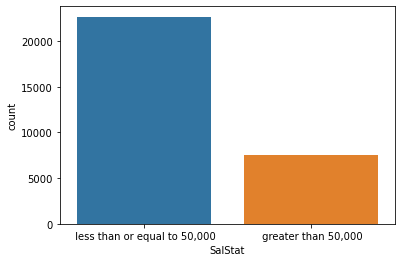

In [16]:
sns.countplot(data_mod["SalStat"])

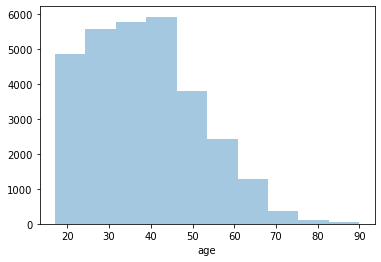

In [17]:
sns.distplot(data_mod["age"], bins = 10, kde = False)

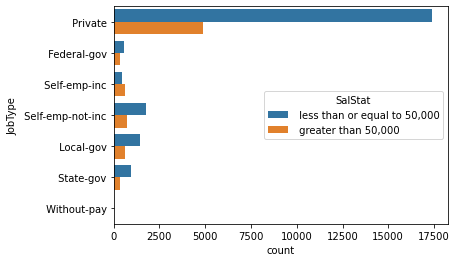

In [18]:
sns.countplot(y = data_mod["JobType"], hue = data_mod["SalStat"])

In [19]:
pd.crosstab(index = data_mod["JobType"], columns = data_mod["SalStat"], margins = True, normalize = "index")

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,0.387063,0.612937
Local-gov,0.294630,0.705370
Private,0.218792,0.781208
Self-emp-inc,0.558659,0.441341
Self-emp-not-inc,0.285714,0.714286
State-gov,0.268960,0.731040
Without-pay,0.000000,1.000000
All,0.248922,0.751078


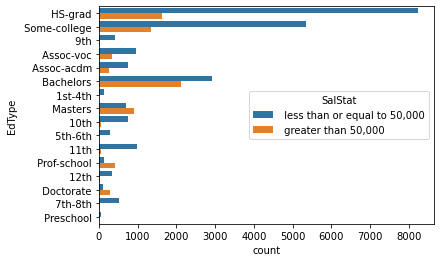

In [20]:
sns.countplot(y = data_mod["EdType"], hue = data_mod["SalStat"])

In [21]:
pd.crosstab(index = data_mod["EdType"], columns = data_mod["SalStat"], margins = True, normalize = "index")

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,0.071951,0.928049
11th,0.056298,0.943702
12th,0.076923,0.923077
1st-4th,0.039735,0.960265
5th-6th,0.041667,0.958333
7th-8th,0.062837,0.937163
9th,0.054945,0.945055
Assoc-acdm,0.253968,0.746032
Assoc-voc,0.263198,0.736802


In [22]:
pd.crosstab(index = data_mod["occupation"], columns = data_mod["SalStat"], margins = True, normalize = "index")

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,0.133835,0.866165
Armed-Forces,0.111111,0.888889
Craft-repair,0.225310,0.774690
Exec-managerial,0.485220,0.514780
Farming-fishing,0.116279,0.883721
Handlers-cleaners,0.061481,0.938519
Machine-op-inspct,0.124619,0.875381
Other-service,0.041096,0.958904
Priv-house-serv,0.006993,0.993007


In [23]:
data_mod["SalStat"] = data_mod["SalStat"].map({' less than or equal to 50,000':0, ' greater than 50,000':1})
print(data_mod["SalStat"])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


<ipython-input-23-2b63605baf68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod["SalStat"] = data_mod["SalStat"].map({' less than or equal to 50,000':0, ' greater than 50,000':1})


In [24]:
new_data = pd.get_dummies(data_mod, drop_first = True)

In [25]:
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [26]:
features = list(set(columns_list)-set(["SalStat"]))
print(features)

['nativecountry_ Germany', 'EdType_ Bachelors', 'EdType_ Some-college', 'JobType_ Self-emp-inc', 'EdType_ Doctorate', 'nativecountry_ India', 'occupation_ Priv-house-serv', 'nativecountry_ El-Salvador', 'EdType_ Prof-school', 'nativecountry_ Cuba', 'relationship_ Not-in-family', 'relationship_ Own-child', 'nativecountry_ Canada', 'occupation_ Sales', 'EdType_ Masters', 'nativecountry_ China', 'JobType_ Private', 'relationship_ Unmarried', 'maritalstatus_ Married-spouse-absent', 'occupation_ Tech-support', 'nativecountry_ South', 'nativecountry_ Columbia', 'maritalstatus_ Widowed', 'EdType_ 12th', 'relationship_ Other-relative', 'maritalstatus_ Never-married', 'nativecountry_ France', 'occupation_ Craft-repair', 'nativecountry_ Hong', 'age', 'nativecountry_ Portugal', 'EdType_ 7th-8th', 'nativecountry_ Haiti', 'nativecountry_ Honduras', 'nativecountry_ Dominican-Republic', 'race_ Other', 'occupation_ Machine-op-inspct', 'occupation_ Armed-Forces', 'nativecountry_ Japan', 'EdType_ 9th', 

In [27]:
y = new_data["SalStat"].values
print(y)

[0 0 1 ... 0 0 0]


In [29]:
x = new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


# Model Fitting

In [30]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [31]:
logistic = LogisticRegression()

In [32]:
logistic.fit(train_x,train_y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
logistic.intercept_

array([-1.04083379])

In [34]:
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [35]:
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6292  531]
 [ 947 1279]]


In [36]:
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8366670350314952


In [38]:
print("Misclassified samples : %d" % (test_y != prediction).sum())

Misclassified samples : 1478
